# (연습) 연속 확률 분포

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [8]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [9]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 균등 분포

**`np.random.uniform()` 함수**

아래 코드는 1만 번 다르게 하면서 아래 과정을 반복 실행한다.

- 구간 $[2, 5]$에서 1,000개의 부동소수점을 균등 분포를 이용하여 선택한다.
- 25개의 구간으로 등분한 후에 구간별 상대도수 분포를 계산한다.
- 구간별 상대도수의 누적합을 계산한다.

최종적으로 구간별 상대도수의 평균값을 계산한다.

구간별 확률 밀도 함수값의 평균값을 계산한다.

In [10]:
iter_num = 10000    # 반복 횟수
bins = 25           # 구간 개수
sample_size = 1000  # 표본 크기

# 구간별 확룰 밀도 함수값의 합 저장용
dens_sum = np.zeros(bins)

# iter_num 횟수만큼 표본 선택 실험 반복
for i in range(iter_num):
    np.random.seed(i) # 시드 다르게 지정
    
    uni1000 = np.random.uniform(2, 5,sample_size)
    dens, bins = np.histogram(uni1000, bins=bins, density=True) # 히스토그램 데이터 생성
    dens_sum += dens # 구간별 누적 확률 밀도 함숫값

# 구간별 평균 확률 밀도 함숫값    
dens_mean = dens_sum / iter_num

아래 코드는
계산된 구간별 확률 밀도 함숫값을 검정 실선 그래프로 그린다.
결과적으로 빨간 직선으로 그려진 $y = 1/3$의 그래프와 거의 유사하다.

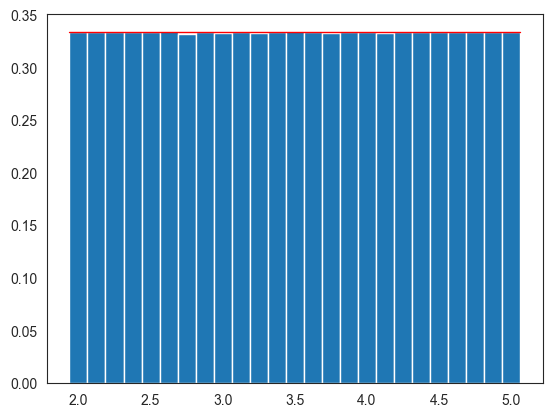

In [45]:
fig, ax = plt.subplots()

# 빨간 직선: y=1/3 그래프
ax.plot(np.arange(-0.5, len(dens_mean)+0.5), np.ones_like(bins) * 1/3, linewidth=1, color='r')

# 막대그래프: 구간별 평균 확률 밀도
ax.bar(range(0, len(dens_mean)), dens_mean, width=1)

ax.set_xticks(np.arange(0, 26, 4))
ax.set_xticklabels(np.arange(2.0, 5.1, 0.5))

plt.show()

## 타이타닉 데이터셋

타이타닉호의 승객에 대한 정보와 생존 여부를 담은 데이터셋을 불러온다.

In [7]:
titanic = pd.read_csv(data_url+"titanic.csv")

각 생존자별로 12개의 정보가 포함된다.

| 특성 | 의미 |
| :--- | :--- |
| PassengerId  | 승객 번호 |
| Survived | 생존 여부. 0 또는 1. 1일 때 생존 |
| Pclass | 승객 클래스 |
| Name | 승객 이름 |
| Sex | 승객의 성 |
| Age | 승객 나이 |
| SibSp | 타이타닉에 함께 승선한 형제자매와 배우자의 수 |
| Parch | 타이타닉에 함께 승선한 자녀와 부모의 수 |
| Ticket | 티켓 번호 |
| Fare | 티켓 요금(영구 파운드화) |
| Cabin | 객실 번호 |
| Embarked | 승객이 타이타닉호에 승선한 항구 |
| | C=Cherbourg, Q=Queenstown, S=Southampton |

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


먼저 `PassengerId` 특성을 인덱스로 지정한다.

In [9]:
titanic = titanic.set_index("PassengerId")
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


데이터셋의 크기인 891보다 적은 수의 `non-null` 값을 갖는 특성에 결측치가 존재한다.

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


`Embarked` 특성의 결측치를 모두 해당 특성의 최빈값으로 대체한다.

In [11]:
embarked_mode =(titanic['Embarked'].mode().values)[0]
titanic['Embarked'] = titanic['Embarked'].fillna(embarked_mode)

`Age` 특성의 결측치를 성(Sex)별 중앙값으로 대체한다.

In [12]:
f_mask = titanic["Sex"]=="female"
f_age_median = titanic.loc[f_mask, "Age"].median()
print("여성 평균연령:", f_age_median)

여성 평균연령: 27.0


In [13]:
m_age_median = titanic.loc[~f_mask, "Age"].median()
print("남성 평균연령:", m_age_median)

남성 평균연령: 29.0


In [14]:
titanic.loc[f_mask, 'Age'] = titanic.loc[f_mask, 'Age'].fillna(f_age_median)
titanic.loc[~f_mask, 'Age'] = titanic.loc[~f_mask, 'Age'].fillna(m_age_median)

`Cabin` 특성을 제외한 모든 결측치가 사라졌음을 확인한다.

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**문제 1**

아래 코드는 `Age` 특성을 10살 단위로 구분하는 연령구간을 지정하여 `Age_Bucket` 특성으로 추가한다.

In [16]:
titanic['Age_Bucket'] = (titanic["Age"] // 10 * 10).astype('i8')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bucket
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S,20


확률 변수 $X$가 타이타닉 데이터셋에서 임의로 선택된 사람의 나이대를 가리킨다고 하자.

(1) 확률 변수 $X$의 확률 분포를 가리키는 데이터프레임을 선언하는 코드를 작성하여라.

In [17]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 확률 변수 $X$의 확률 분포가 확률의 성질을 만족함을 보이는 코드를 작성하여라.

In [18]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) 확률 변수 $X$의 확률 질량 함수를 선언한 다음에 30대에 포함될 확률을 계산하여라.

In [19]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(4) 확률 변수$X$의 누적 분포 함수를 선언하고, 50대 이하에 속할 확률을 계산하여라.

In [20]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 2**

`Embarked` 특성은 승객이 탑승한 항구를 구분한다.

In [21]:
titanic.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

각 기호가 가리키는 항구와 방문 순서는 다음과 같다.

| 순서 | 기호 | 항구 |
| :---: | :---: | :--- |
| 1 | Q | Queenstown(퀸즈타운, 영국) |
| 2 | C | Cherbourg(셰르부르, 프랑스) |
| 3 | S | Southampton(사우스햄튼, 아일랜드 |

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/Titanic_voyage.png" style="width:750px"></div></p>

확률 변수 $Y$가 `Embarked` 특성의 값을 가리키도록 한다.

(1) 확률 변수 $Y$의 확률 분포를 가리키는 데이터프레임을 선언하는 코드를 작성하여라.

In [22]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 확률 변수 $Y$의 확률 질량 함수를 선언한 다음에 Cherbourg에서 승객이 탑승했을 확률을 계산하여라.

In [24]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) 이산 결합 확률 변수 $(X, Y)$의 이산 결합 확률 밀도 함수를 구현한 다음에
임의로 선택된 20대 승객이면서 Queenstown에서 탑승했을 확률을 계산하여라.

In [25]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(4) 이산 결합 확률 변수 $(X, Y)$의 이산 확률 분포의 히트맵을 그리는 코드를 작성하여라.

In [26]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(5) 이산 결합 확률 변수 $(X, Y)$에 대한 조건부 확률 질량 함수를 선언한 다음에
Southhampton에서 탑승한 사람이 40대일 확률을 계산하여라.

In [27]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(6) 이산 결합 확률 변수 $(X, Y)$의 이산 확률 질량 함수로부터 각 확률 변수에 대한 확률 질량 함수를 정의한 다음에
앞서 선언한 확률 질량 함수와 동일함을 보이는 코드를 구현하여라.

In [28]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
